In [1]:
from mantisshrimp.all import *

In [2]:
source = Path('../nbs/samples').absolute()
annot_json = json.load((source/'annotations.json').open())

In [3]:
parser = COCOParser(annot_json, source/'images')
records = parser.parse()


Removed 0 images that don't have annotations


In [4]:
id2cat = {o['id']:o['name'] for o in annot_json['categories']}

In [5]:
import albumentations as A

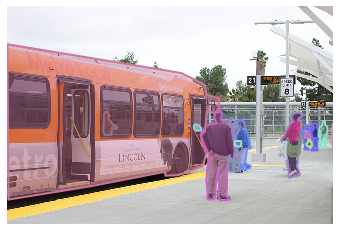

In [6]:
record = records[0]
im = open_img(record.iinfo.fp)
# show_img(im)
show_record(record)

In [7]:
from pycocotools import mask as maskUtils

In [8]:
polys = record.annot.segs

In [9]:
# TODO: need to differentiate polygons and rle
masks = [o.to_mask(record.iinfo.h, record.iinfo.w) for o in polys]

In [10]:
masks_arr = np.stack(masks)

In [11]:
def get_aug(aug):
    return A.Compose(aug, bbox_params=A.BboxParams(format='coco', label_fields=['oids']))

In [22]:
aug = get_aug([A.HorizontalFlip(p=1.0), A.RandomSunFlare(p=1)])

In [23]:
res = aug(image=im, masks=masks, bboxes=record.annot.bboxes, oids=record.annot.oids)

In [24]:
from copy import deepcopy

In [25]:
aug_record = deepcopy(record)
aug_record.annot.bboxes = [BBox(o) for o in res['bboxes']]
aug_record.annot.oids = res['oids']
aug_record.annot.segs = res['masks']

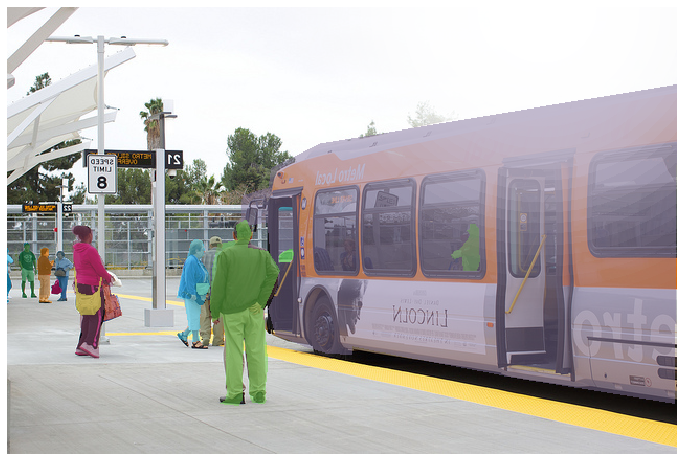

In [26]:
show_record(aug_record, im=res['image'], id2cat=id2cat, figsize=(12,12))

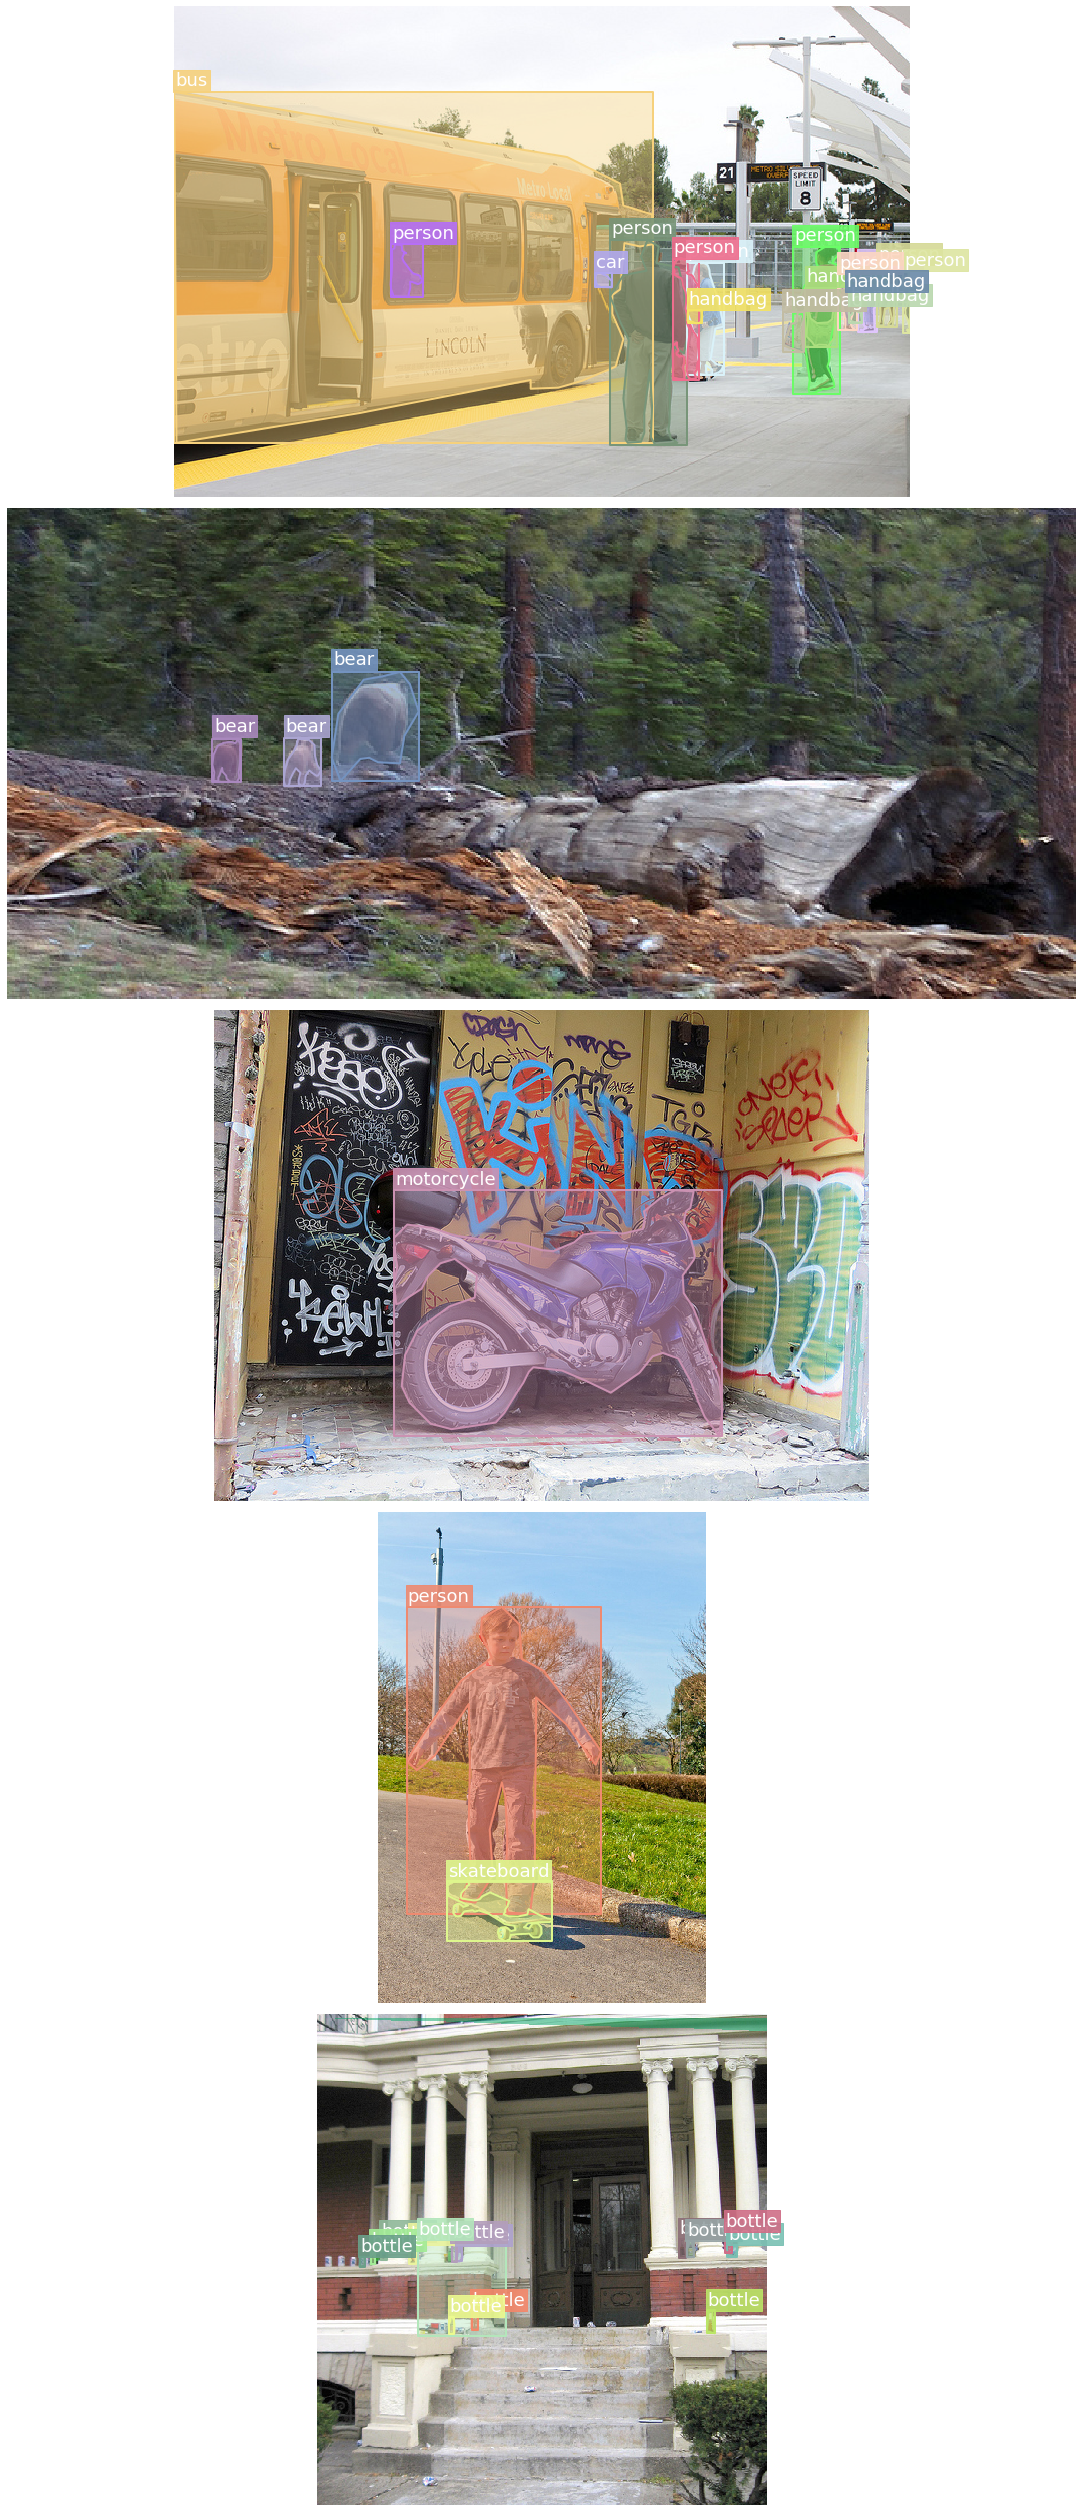

In [12]:
grid(partial(show_record, id2cat=id2cat, draw_bbox=True), records)